# INTRODUCTION

# Predicting the Impact of Air Quality on Human Health


## Objective
The goal of this project is to develop a machine learning model that can predict how air quality affects human health.

## Background
Air pollution is one of the most influential environmental factors affecting public health. Thus, the aim of this project would be to predict health outcomes through various indicators of air quality.

## Dataset Description
The dataset contains 5,811 records of 15 features, including air quality indicators of PM10, PM2.5, and NO2, among others, and health outcomes such as respiratory cases.


## Load and Explore Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
data_path = '/content/drive/My Drive/air-quality-respiratory-impact-project/air_quality_health_impact_data.csv'
air_df=  pd.read_csv(data_path)

In [ ]:
# Display basic imformation about the dataset
air_df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [ ]:
air_df.shape

(5811, 15)

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [ ]:
air_df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


## EDA and Data Preprocessing

In [ ]:
air_df.duplicated().sum()

0

In [ ]:
air_df.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [ ]:
# Define the new class mapping
def reclassify_health_impact(impact_class):
    if impact_class in [0, 1]:
        return 'High'
    elif impact_class == 2:
        return 'Moderate'
    elif impact_class in [3, 4]:
        return 'Low'

# Apply the new classification
air_df['HealthImpactClass_New'] = air_df['HealthImpactClass'].apply(reclassify_health_impact)

# Check the new class distribution
print(air_df['HealthImpactClass_New'].value_counts())



HealthImpactClass_New
High        5387
Moderate     273
Low          151
Name: count, dtype: int64


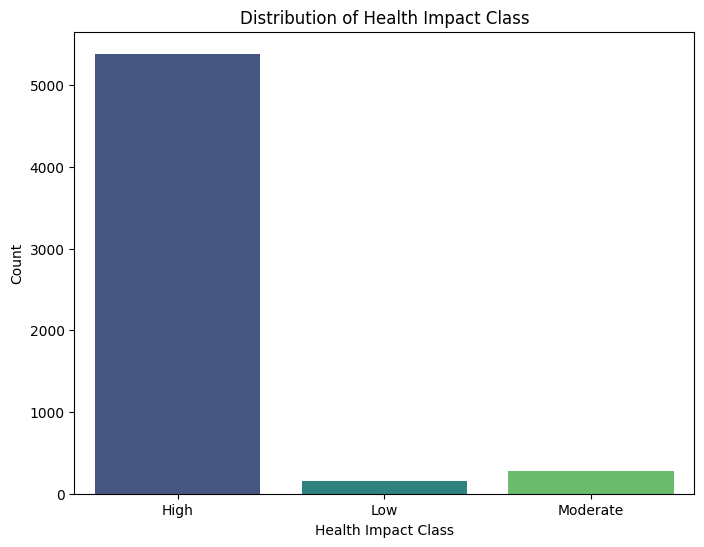

In [ ]:
# Distribution of HealthImpactClass
plt.figure(figsize=(8, 6))
sns.countplot(x='HealthImpactClass_New', data=air_df, palette='viridis')
plt.title('Distribution of Health Impact Class')
plt.xlabel('Health Impact Class')
plt.ylabel('Count')
plt.show()


In [ ]:
# air_df['HealthImpactClass'].value_counts()

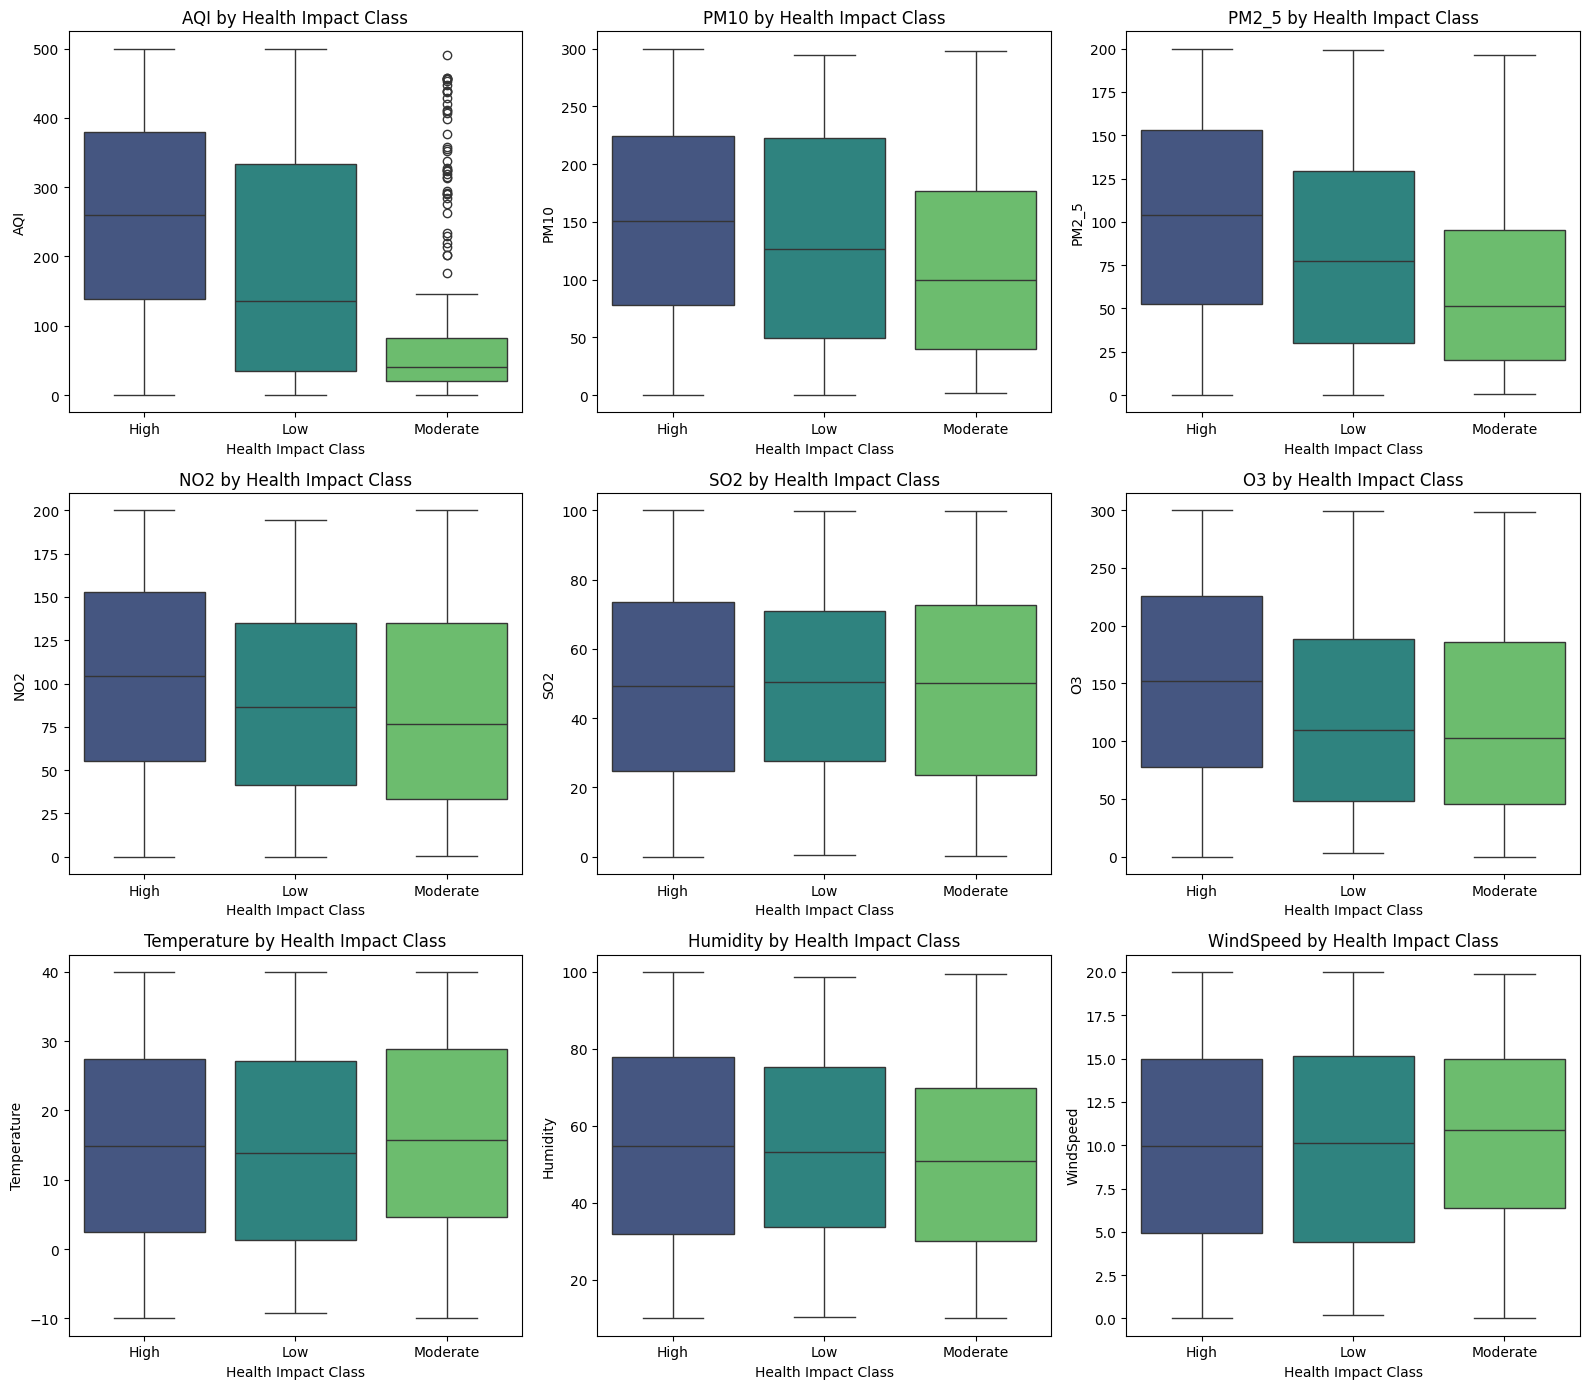

In [ ]:
features = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']

# Boxplots for features by HealthImpactClass
plt.figure(figsize=(16, 14))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='HealthImpactClass_New', y=feature, data=air_df, palette='viridis')
    plt.title(f'{feature} by Health Impact Class')
    plt.xlabel('Health Impact Class')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
# Separate features and target
X = air_df.drop(columns=['HealthImpactScore', 'HealthImpactClass', 'RecordID', 'HealthImpactClass_New'])  # Drop target and any other non-feature columns
y = air_df['HealthImpactClass_New']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X_train.shape, y_train.shape

((4648, 12), (4648,))

In [ ]:
X_test.shape, y_test.shape

((1163, 12), (1163,))

 Feature Scaling

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.shape

(4648, 12)

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape

(1163, 12)

## Model Development

1. Baseline model(Logistic Regression)

In [ ]:
# Initialize the logistic regression model
logreg= LogisticRegression(random_state= 42, max_iter= 1000 )
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy= accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy: .4f}")

Logistic Regression Accuracy:  0.9312


In [ ]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        High       0.94      1.00      0.97      1077
         Low       0.00      0.00      0.00        33
    Moderate       0.43      0.11      0.18        53

    accuracy                           0.93      1163
   macro avg       0.46      0.37      0.38      1163
weighted avg       0.89      0.93      0.90      1163

Confusion Matrix:
[[1077    0    0]
 [  25    0    8]
 [  47    0    6]]


2. Decision Trees

In [ ]:
# decision tree model
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8960
Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.94      0.95      1077
         Low       0.08      0.06      0.07        33
    Moderate       0.34      0.43      0.38        53

    accuracy                           0.90      1163
   macro avg       0.46      0.48      0.47      1163
weighted avg       0.90      0.90      0.90      1163

Confusion Matrix:
[[1017   19   41]
 [  28    2    3]
 [  26    4   23]]


3. Random Forest

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_

y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9329320722269991
Classification Report:
               precision    recall  f1-score   support

        High       0.94      1.00      0.97      1077
         Low       0.00      0.00      0.00        33
    Moderate       0.60      0.17      0.26        53

    accuracy                           0.93      1163
   macro avg       0.51      0.39      0.41      1163
weighted avg       0.90      0.93      0.91      1163

Confusion Matrix:
 [[1076    0    1]
 [  28    0    5]
 [  44    0    9]]


In [ ]:
# Assuming X_train_scaled has column names
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                Feature  Importance
0                   AQI    0.205346
2                 PM2_5    0.114684
5                    O3    0.097817
1                  PM10    0.097156
3                   NO2    0.084486
4                   SO2    0.075069
6           Temperature    0.071755
8             WindSpeed    0.070436
7              Humidity    0.068413
9      RespiratoryCases    0.047203
10  CardiovascularCases    0.038312
11   HospitalAdmissions    0.029323


4. XGBoost

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
# Initialize and train the XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
xgb_y_pred_encoded = xgb.predict(X_test_scaled)

# Decode
xgb_y_pred = le.inverse_transform(xgb_y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_y_pred)
conf_matrix = confusion_matrix(y_test, xgb_y_pred)
class_report = classification_report(y_test, xgb_y_pred)

# Print results
print("XGBoost Classifier Accuracy: {:.4f}".format(accuracy))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

XGBoost Classifier Accuracy: 0.9458

Confusion Matrix:
[[1070    0    7]
 [  24    2    7]
 [  24    1   28]]

Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.99      0.97      1077
         Low       0.67      0.06      0.11        33
    Moderate       0.67      0.53      0.59        53

    accuracy                           0.95      1163
   macro avg       0.76      0.53      0.56      1163
weighted avg       0.94      0.95      0.93      1163



In [76]:
!git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Air-quality-health-prediction (1).ipynb

no changes added to commit (use "git add" and/or "git commit -a")
